In [ ]:
!wget http://cb.lk/covid_19
!unzip covid_19

--2022-12-05 10:41:02--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-12-05 10:41:02--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-12-05 10:41:03--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b3

In [ ]:
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '/content/CovidDataset/Train/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False)


test_set = test_datagen.flow_from_directory(
        '/content/CovidDataset/Val/',
        target_size=(224, 224),batch_size=32,class_mode='binary',
        shuffle=False)


Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer="sgd", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
results=model.fit( train_set, epochs=10,validation_data=test_set,steps_per_epoch=7,validation_steps=2)


Epoch 1/10
7/7 [==============================] - 13s 2s/step - loss: 0.6955 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6954 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.6952 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.6950 - accuracy: 0.0714 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.6949 - accuracy: 0.3571 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
7/7 [========================

In [ ]:
model.evaluate(train_set)

7/7 [==============================] - 6s 817ms/step - loss: 0.6930 - accuracy: 0.5000


[0.6930452585220337, 0.5]

In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 2s 908ms/step - loss: 0.6930 - accuracy: 0.5000


[0.6930477023124695, 0.5]

In [ ]:
y_pred= (model.predict(test_set)>=0.5).astype(int)

2/2 [==============================] - 2s 567ms/step


In [ ]:
test_set.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_set.labels,y_pred))
print(accuracy_score(test_set.labels,y_pred)*100)


[[30  0]
 [30  0]]
50.0


Text(0.5, 0, 'epoch')

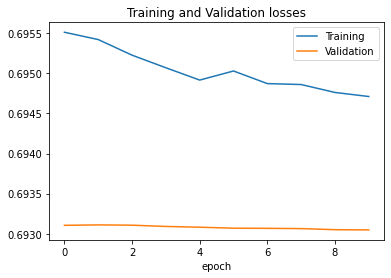

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
#plt.ylim([0,1])

Text(0.5, 0, 'epoch')

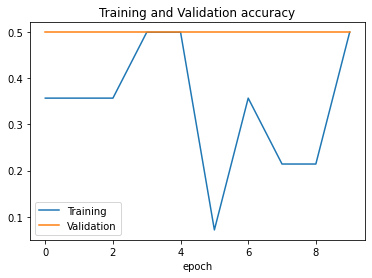

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
#plt.ylim([0,1])